<a href="https://colab.research.google.com/github/afshari-maryam/Adversarial-domain-adaptation/blob/main/Answer_question1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

raw_datasets = load_dataset("glue", "mrpc")
raw_datasets

Generating train split:   0%|          | 0/3668 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/408 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1725 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/mrpc/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})

In [ ]:
raw_train_dataset = raw_datasets["train"]
raw_train_dataset[0]

{'sentence1': 'Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .',
 'sentence2': 'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .',
 'label': 1,
 'idx': 0}

In [ ]:
raw_train_dataset.features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['not_equivalent', 'equivalent'], id=None),
 'idx': Value(dtype='int32', id=None)}

 Try it out! Look at element 15 of the training set and element 87 of the validation set. What are their labels?

In [ ]:
raw_datasets["train"][14]

{'sentence1': 'Gyorgy Heizler , head of the local disaster unit , said the coach was carrying 38 passengers .',
 'sentence2': 'The head of the local disaster unit , Gyorgy Heizler , said the coach driver had failed to heed red stop lights .',
 'label': 0,
 'idx': 15}

In [ ]:
raw_datasets["validation"][87]

{'sentence1': 'However , EPA officials would not confirm the 20 percent figure .',
 'sentence2': 'Only in the past few weeks have officials settled on the 20 percent figure .',
 'label': 0,
 'idx': 812}

Answer of Question

In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained("distilbert-base-uncased")
text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')
output = model(**encoded_input)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
from datasets import load_dataset

wiki_dataset = load_dataset("wikitext","wikitext-2-raw-v1")
wiki_dataset

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

Dataset wikitext downloaded and prepared to /root/.cache/huggingface/datasets/wikitext/wikitext-2-raw-v1/1.0.0/a241db52902eaf2c6aa732210bead40c090019a499ceb13bcbfa3f8ab646a126. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    test: Dataset({
        features: ['text'],
        num_rows: 4358
    })
    train: Dataset({
        features: ['text'],
        num_rows: 36718
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 3760
    })
})

In [ ]:
raw_datasets["train"][10]

{'sentence1': 'Legislation making it harder for consumers to erase their debts in bankruptcy court won overwhelming House approval in March .',
 'sentence2': 'Legislation making it harder for consumers to erase their debts in bankruptcy court won speedy , House approval in March and was endorsed by the White House .',
 'label': 0,
 'idx': 11}

In [ ]:
unmasker("Legislation making it harder for [MASK] to erase their debts in bankruptcy court won overwhelming House approval in March .")

[{'score': 0.7652623057365417,
  'token': 23112,
  'token_str': 'creditors',
  'sequence': 'legislation making it harder for creditors to erase their debts in bankruptcy court won overwhelming house approval in march.'},
 {'score': 0.029530471190810204,
  'token': 26457,
  'token_str': 'taxpayers',
  'sequence': 'legislation making it harder for taxpayers to erase their debts in bankruptcy court won overwhelming house approval in march.'},
 {'score': 0.022538108751177788,
  'token': 23953,
  'token_str': 'plaintiffs',
  'sequence': 'legislation making it harder for plaintiffs to erase their debts in bankruptcy court won overwhelming house approval in march.'},
 {'score': 0.012521612457931042,
  'token': 5085,
  'token_str': 'banks',
  'sequence': 'legislation making it harder for banks to erase their debts in bankruptcy court won overwhelming house approval in march.'},
 {'score': 0.011958945542573929,
  'token': 15337,
  'token_str': 'shareholders',
  'sequence': 'legislation making i

In [ ]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='distilbert-base-uncased')
unmasker("Hello I'm a [MASK] model.")

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

[{'score': 0.05292879790067673,
  'token': 2535,
  'token_str': 'role',
  'sequence': "hello i'm a role model."},
 {'score': 0.039685845375061035,
  'token': 4827,
  'token_str': 'fashion',
  'sequence': "hello i'm a fashion model."},
 {'score': 0.03474382683634758,
  'token': 2449,
  'token_str': 'business',
  'sequence': "hello i'm a business model."},
 {'score': 0.03462290018796921,
  'token': 2944,
  'token_str': 'model',
  'sequence': "hello i'm a model model."},
 {'score': 0.018145175650715828,
  'token': 11643,
  'token_str': 'modeling',
  'sequence': "hello i'm a modeling model."}]

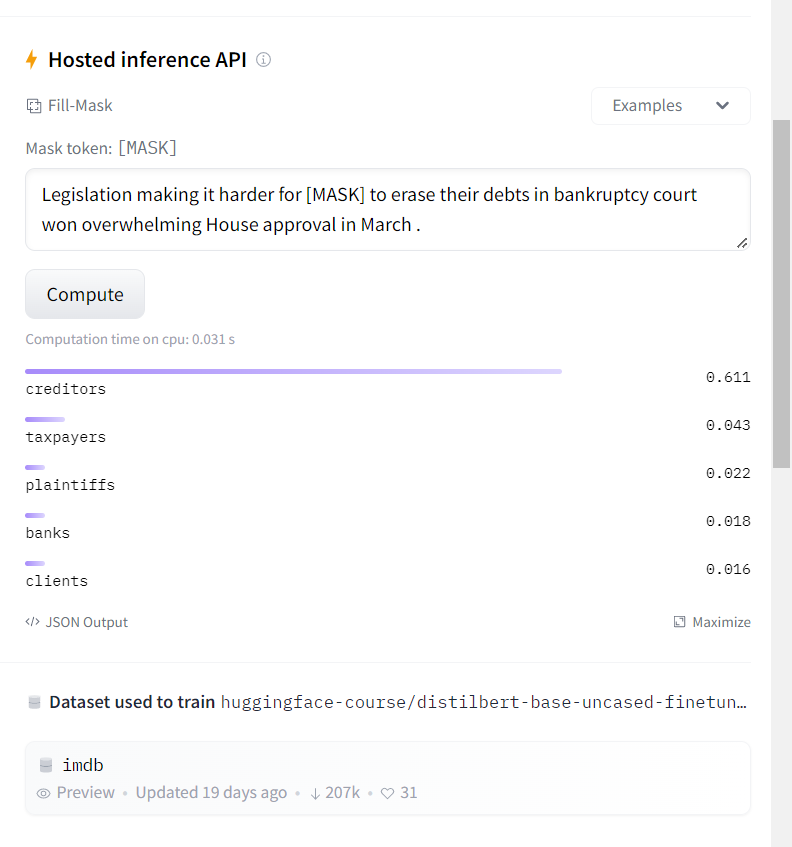

https://huggingface.co/huggingface-course/distilbert-base-uncased-finetuned-imdb?text=Legislation+making+it+harder+for+%5BMASK%5D+to+erase+their+debts+in+bankruptcy+court+won+overwhelming+House+approval+in+March+.

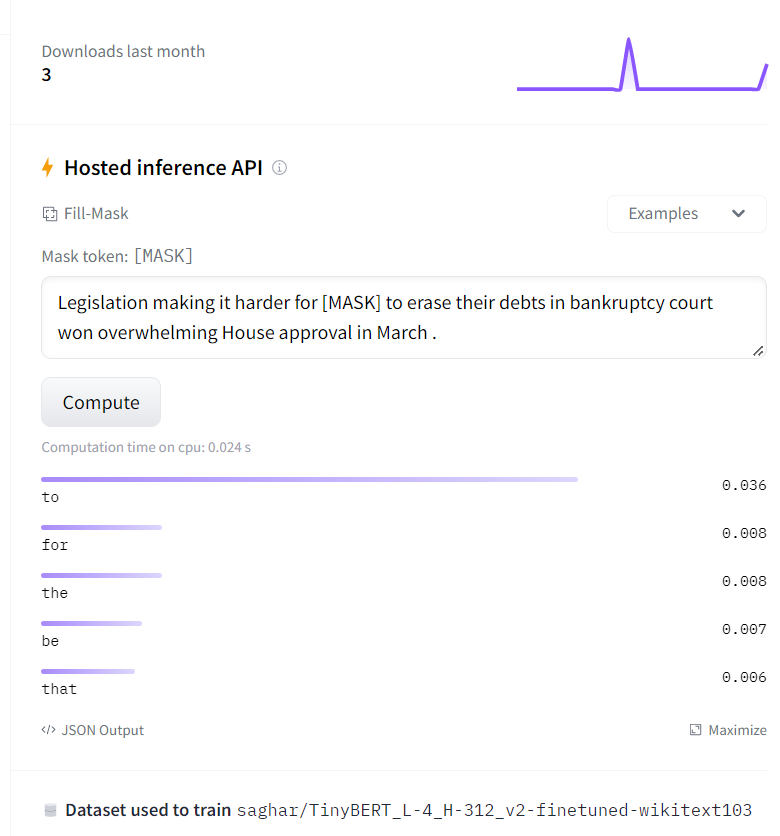

https://huggingface.co/saghar/TinyBERT_L-4_H-312_v2-finetuned-wikitext103?text=Legislation+making+it+harder+for+%5BMASK%5D+to+erase+their+debts+in+bankruptcy+court+won+overwhelming+House+approval+in+March+.

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")
model = AutoModelForMaskedLM.from_pretrained("distilbert-base-cased")

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/263M [00:00<?, ?B/s]

In [ ]:
model1 =model

In [ ]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model=model1)
unmasker("Hello I'm a [MASK] model.")

Exception: ignored

Train phase:

https://huggingface.co/course/chapter7/3?fw=pt#fine-tuning-a-masked-language-model

In [ ]:
from transformers import AutoModelForMaskedLM

model_checkpoint = "distilbert-base-uncased"
model = AutoModelForMaskedLM.from_pretrained(model_checkpoint)

In [ ]:
distilbert_num_parameters = model.num_parameters() / 1_000_000
print(f"'>>> DistilBERT number of parameters: {round(distilbert_num_parameters)}M'")
print(f"'>>> BERT number of parameters: 110M'")

'>>> DistilBERT number of parameters: 67M'
'>>> BERT number of parameters: 110M'


In [ ]:
text = "This is a great [MASK]."

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
import torch

inputs = tokenizer(text, return_tensors="pt")
token_logits = model(**inputs).logits
# Find the location of [MASK] and extract its logits
mask_token_index = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1]
mask_token_logits = token_logits[0, mask_token_index, :]
# Pick the [MASK] candidates with the highest logits
top_5_tokens = torch.topk(mask_token_logits, 5, dim=1).indices[0].tolist()

for token in top_5_tokens:
    print(f"'>>> {text.replace(tokenizer.mask_token, tokenizer.decode([token]))}'")

'>>> This is a great deal.'
'>>> This is a great success.'
'>>> This is a great adventure.'
'>>> This is a great idea.'
'>>> This is a great feat.'


In [ ]:
text2 ="Legislation making it harder for consumers to erase their debts in bankruptcy court won overwhelming House approval in March ."

In [ ]:
text2 ="Legislation making it harder for [MASK] to erase their debts in bankruptcy court won overwhelming House approval in March ."

In [ ]:
import torch

inputs = tokenizer(text2, return_tensors="pt")
token_logits = model(**inputs).logits
# Find the location of [MASK] and extract its logits
mask_token_index = torch.where(inputs["input_ids"] == tokenizer.mask_token_id)[1]
mask_token_logits = token_logits[0, mask_token_index, :]
# Pick the [MASK] candidates with the highest logits
top_5_tokens = torch.topk(mask_token_logits, 5, dim=1).indices[0].tolist()

for token in top_5_tokens:
    print(f"'>>> {text.replace(tokenizer.mask_token, tokenizer.decode([token]))}'")

'>>> This is a great creditors.'
'>>> This is a great taxpayers.'
'>>> This is a great plaintiffs.'
'>>> This is a great banks.'
'>>> This is a great shareholders.'


In [ ]:
from datasets import load_dataset

imdb_dataset = load_dataset("imdb")
imdb_dataset

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/2fdd8b9bcadd6e7055e742a706876ba43f19faee861df134affd7a3f60fc38a1. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [ ]:
sample = imdb_dataset["train"].shuffle(seed=42).select(range(3))

for row in sample:
    print(f"\n'>>> Review: {row['text']}'")
    print(f"'>>> Label: {row['label']}'")


'>>> Review: There is no relation at all between Fortier and Profiler but the fact that both are police series about violent crimes. Profiler looks crispy, Fortier looks classic. Profiler plots are quite simple. Fortier's plot are far more complicated... Fortier looks more like Prime Suspect, if we have to spot similarities... The main character is weak and weirdo, but have "clairvoyance". People like to compare, to judge, to evaluate. How about just enjoying? Funny thing too, people writing Fortier looks American but, on the other hand, arguing they prefer American series (!!!). Maybe it's the language, or the spirit, but I think this series is more English than American. By the way, the actors are really good and funny. The acting is not superficial at all...'
'>>> Label: 1'

'>>> Review: This movie is a great. The plot is very true to the book which is a classic written by Mark Twain. The movie starts of with a scene where Hank sings a song with a bunch of kids called "when you stu